# Reading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re

In [2]:
data=pd.read_csv('data/CRDC2013_14.csv')

In [3]:
data.head()

,LEA_STATE,LEA_NAME,SCH_NAME,COMBOKEY,LEAID,SCHID,JJ,CCD_LATCOD,CCD_LONCOD,NCES_SCHOOL_ID,...,SCH_FTE_TEACH_WOFED,SCH_SAL_TEACH_WOFED,SCH_NPE_WOFED,DSO_SCH_FTE_TEACH_WOFED,DSO_SCH_NPE_WOFED,DSO_SCH_SAL_INSTR_WOFED,DSO_SCH_SAL_TEACH_WOFED,SCH_JJTYPE,SCH_JJSYDAYS,SCH_JJHOURS
0,TX,DENTON ISD,RYAN EL,481674008530,4816740,8530,NO,33.1604,-97.1354,4.816740e+11,...,39.00,2274986.15,316158.74,0,0,0,0,-9,-9,-9
1,LA,LAFAYETTE PARISH,JUDICE MIDDLE SCHOOL,220087000675,2200870,675,NO,30.1673,-92.1403,2.200870e+11,...,32.95,1585446.66,32769.37,0,0,0,0,-9,-9,-9
2,GA,HENRY COUNTY,EAGLE'S LANDING MIDDLE SCHOOL,130282000399,1302820,399,NO,33.4885,-84.2086,1.302820e+11,...,48.18,2294195.77,0.00,0,0,0,0,-9,-9,-9
3,FL,MONROE,KEYS CENTER,120132007521,1201320,7521,NO,24.5638,-81.7980,1.201320e+11,...,1.00,61369.15,34275.00,0,0,0,0,-9,-9,-9
4,OH,CLARK-SHAWNEE LOCAL,POSSUM ELEMENTARY SCHOOL,390462802499,3904628,2499,NO,39.8864,-83.8388,3.904628e+11,...,14.02,840251.25,616504.50,0,0,0,0,-9,-9,-9


# Analyzing juvenile justice and status magnet

In [4]:
print(data["JJ"].value_counts())
print(data["SCH_STATUS_MAGNET"].value_counts())

NO     992
YES      8
Name: JJ, dtype: int64
NO     948
YES     52
Name: SCH_STATUS_MAGNET, dtype: int64


In [5]:
pivot_jj=data.pivot_table(index='JJ',values=['TOT_ENR_M','TOT_ENR_F'],aggfunc=np.sum)
pivot_sch_status=data.pivot_table(index='SCH_STATUS_MAGNET',values=['TOT_ENR_M','TOT_ENR_F'],aggfunc=np.sum)
   
print(pivot_jj)
print(pivot_sch_status)

     TOT_ENR_F  TOT_ENR_M
JJ                       
NO      252915     266702
YES         71        427
                   TOT_ENR_F  TOT_ENR_M
SCH_STATUS_MAGNET                      
NO                    232487     245629
YES                    20499      21500


# Exploring Gender Distribution in Enrollment

In [6]:
data['total_enrollments'] = data['TOT_ENR_M'] + data['TOT_ENR_F']
data[['TOT_ENR_M','TOT_ENR_F']].sum()/data['total_enrollments'].sum()


TOT_ENR_M    0.513596
TOT_ENR_F    0.486404
dtype: float64

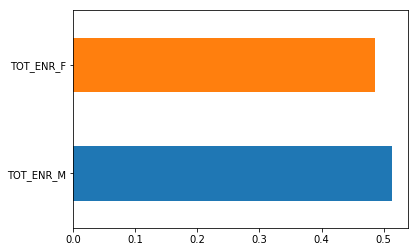

In [7]:
(data[['TOT_ENR_M','TOT_ENR_F']].sum()/data['total_enrollments'].sum()).plot.barh()


# Exploring Race and Gender Distributions in Enrollment

In [8]:
cols = ['SCH_ENR_HI_M',
 'SCH_ENR_HI_F',
 'SCH_ENR_AM_M',
 'SCH_ENR_AM_F',
 'SCH_ENR_AS_M',
 'SCH_ENR_AS_F',
 'SCH_ENR_HP_M',
 'SCH_ENR_HP_F',
 'SCH_ENR_BL_M',
 'SCH_ENR_BL_F',
 'SCH_ENR_WH_M',
 'SCH_ENR_WH_F',
 'SCH_ENR_TR_M',
 'SCH_ENR_TR_F']

data[cols].sum()/data['total_enrollments'].sum()

SCH_ENR_HI_M    0.134426
SCH_ENR_HI_F    0.127153
SCH_ENR_AM_M    0.007250
SCH_ENR_AM_F    0.006898
SCH_ENR_AS_M    0.025740
SCH_ENR_AS_F    0.024696
SCH_ENR_HP_M    0.001805
SCH_ENR_HP_F    0.001884
SCH_ENR_BL_M    0.072086
SCH_ENR_BL_F    0.069121
SCH_ENR_WH_M    0.257076
SCH_ENR_WH_F    0.241385
SCH_ENR_TR_M    0.015212
SCH_ENR_TR_F    0.015266
dtype: float64

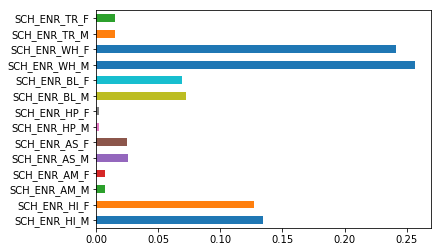

In [9]:
ax = (data[cols].sum()/data['total_enrollments'].sum()).plot.barh()

# Gender Differences in Magnet Schools


In [10]:
magnet_schools = data[data['SCH_STATUS_MAGNET']=='YES']

magnet_schools[['TOT_ENR_M','TOT_ENR_F']].sum()/magnet_schools['total_enrollments'].sum()


TOT_ENR_M    0.511917
TOT_ENR_F    0.488083
dtype: float64

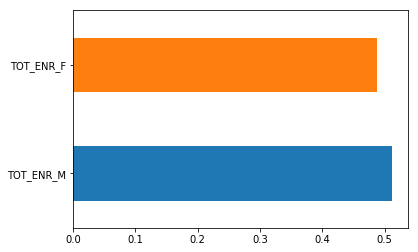

In [11]:
(magnet_schools[['TOT_ENR_M','TOT_ENR_F']].sum()/magnet_schools['total_enrollments'].sum()).plot.barh()

# Gender and Race Differences in Magnet Schools

In [12]:
magnet_schools[cols].sum()/magnet_schools['total_enrollments'].sum()

SCH_ENR_HI_M    0.188338
SCH_ENR_HI_F    0.171885
SCH_ENR_AM_M    0.002952
SCH_ENR_AM_F    0.002310
SCH_ENR_AS_M    0.036001
SCH_ENR_AS_F    0.034453
SCH_ENR_HP_M    0.000905
SCH_ENR_HP_F    0.001357
SCH_ENR_BL_M    0.129313
SCH_ENR_BL_F    0.126622
SCH_ENR_WH_M    0.143051
SCH_ENR_WH_F    0.139027
SCH_ENR_TR_M    0.011357
SCH_ENR_TR_F    0.012429
dtype: float64

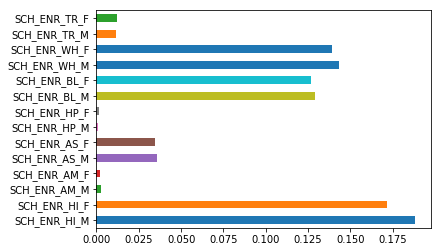

In [13]:
(magnet_schools[cols].sum()/magnet_schools['total_enrollments'].sum()).plot.barh()